# 🎰 Bayesian Bandit - Thompson Sampling เข้าใจง่าย ๆ

**ผู้เขียน**: Hamdee Naseng  
**วันที่**: 3 พฤศจิกายน 2025  
**วัตถุประสงค์**: สาธิตการทำงานของ Bayesian Bandit Algorithm (Thompson Sampling)

---

## 🎯 ปัญหาที่เราจะแก้

**สถานการณ์**: คุณมีเครื่องสล็อต (Bandit) 3 เครื่อง แต่ละเครื่องมีโอกาสชนะที่ไม่เท่ากัน  
**เป้าหมาย**: หาเครื่องที่ดีที่สุด และทำกำไรให้ได้มากที่สุด!

**ปัญหาคือ**: เราไม่รู้ว่าเครื่องไหนดีกว่ากัน ต้องทดลองเล่นไปเรื่อย ๆ

---

## 🧠 แนวคิดหลัก: Thompson Sampling

**คิดแบบนี้**:
1. 🎲 **Sample** (สุ่มทายความน่าจะเป็นของแต่ละเครื่อง)
2. 🎯 **Choose** (เลือกเครื่องที่ทายว่าดีที่สุด)
3. 🎰 **Play** (ลองเล่น)
4. 📊 **Update** (อัพเดทความรู้จากผลลัพธ์)
5. 🔁 **Repeat** (ทำซ้ำ)

ยิ่งเล่นไปนาน ๆ เราก็จะรู้จักเครื่องแต่ละตัวดีขึ้น!

---

## 📦 Step 1: Import โค้ดจาก machine_learning_examples

เราจะนำโค้ดที่มีอยู่แล้วมาใช้ แทนที่จะเขียนใหม่ทั้งหมด

In [1]:
# เพิ่ม path เพื่อให้ import ได้
import sys
sys.path.append('../../machine_learning_examples-master')

# Import library ที่จำเป็น
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

# Import โค้ดหลักจาก bayesian_bandit.py
from ab_testing.bayesian_bandit import Bandit, plot, experiment

print("✅ Import สำเร็จ! พร้อมเริ่มเรียนรู้")

✅ Import สำเร็จ! พร้อมเริ่มเรียนรู้


## 🎰 Step 2: ทำความเข้าใจ Class Bandit

Class `Bandit` คือเครื่องสล็อตตัวหนึ่ง มี 3 ส่วนสำคัญ:

### 📋 ตัวแปรภายใน:
- `p` = โอกาสชนะจริง ๆ (เราไม่รู้ ต้องเรียนรู้)
- `a`, `b` = พารามิเตอร์ของ Beta distribution (เริ่มต้นที่ 1, 1)
- `N` = จำนวนครั้งที่เราเล่นเครื่องนี้

### 🔧 ฟังก์ชันหลัก:
1. **pull()** - ลองเล่นเครื่อง ได้ True (ชนะ) หรือ False (แพ้)
2. **sample()** - สุ่มทายความน่าจะเป็นจาก Beta distribution
3. **update(x)** - อัพเดทความรู้หลังจากเล่นแล้ว

มาลองสร้างเครื่องสล็อต 1 เครื่องกันดู!

In [2]:
# สร้างเครื่องสล็อตที่มีโอกาสชนะ 30%
bandit = Bandit(p=0.3)

print(f"เครื่องสล็อตนี้มีโอกาสชนะจริง ๆ = {bandit.p}")
print(f"ความรู้เริ่มต้นของเรา: a={bandit.a}, b={bandit.b}")
print(f"จำนวนครั้งที่เล่น: {bandit.N}")

# ลองเล่น 5 ครั้ง
print("\n🎲 ทดลองเล่น 5 ครั้ง:")
for i in range(5):
    result = bandit.pull()
    bandit.update(result)
    print(f"  ครั้งที่ {i+1}: {'🎉 ชนะ!' if result else '❌ แพ้'}")

print(f"\n📊 หลังเล่น 5 ครั้ง:")
print(f"  ความรู้ที่อัพเดทแล้ว: a={bandit.a}, b={bandit.b}")
print(f"  Win rate ที่เราสังเกตได้: {(bandit.a-1)}/{bandit.N} = {(bandit.a-1)/bandit.N:.2%}")

เครื่องสล็อตนี้มีโอกาสชนะจริง ๆ = 0.3
ความรู้เริ่มต้นของเรา: a=1, b=1
จำนวนครั้งที่เล่น: 0

🎲 ทดลองเล่น 5 ครั้ง:
  ครั้งที่ 1: ❌ แพ้
  ครั้งที่ 2: 🎉 ชนะ!
  ครั้งที่ 3: ❌ แพ้
  ครั้งที่ 4: ❌ แพ้
  ครั้งที่ 5: ❌ แพ้

📊 หลังเล่น 5 ครั้ง:
  ความรู้ที่อัพเดทแล้ว: a=2, b=5
  Win rate ที่เราสังเกตได้: 1/5 = 20.00%


## 🎲 Step 3: Thompson Sampling - วิธีเลือกเครื่อง

**ปัญหา**: ถ้ามีหลายเครื่อง เราจะเลือกเล่นเครื่องไหนดี?

**วิธีแก้**: Thompson Sampling
1. **สุ่มทาย** (sample) โอกาสชนะของแต่ละเครื่อง
2. **เลือกเครื่องที่ทายว่าดีที่สุด**
3. เล่นเครื่องนั้น และอัพเดทความรู้

**ข้อดี**: สมดุลระหว่าง **Exploration** (ลองเครื่องใหม่) กับ **Exploitation** (เล่นเครื่องที่ดี)

มาลองเปรียบเทียบ 3 เครื่องกัน!

In [3]:
# สร้าง 3 เครื่อง มีโอกาสชนะต่างกัน
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]  # เครื่อง 3 ดีที่สุด!
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

print("🎰 เรามี 3 เครื่องสล็อต:")
for i, b in enumerate(bandits):
    print(f"  เครื่อง {i+1}: โอกาสชนะจริง = {b.p:.0%}")

# สุ่มทาย (sample) ความน่าจะเป็นของแต่ละเครื่อง
print("\n🎲 Thompson Sampling - สุ่มทาย 5 ครั้ง:")
for round in range(5):
    samples = [b.sample() for b in bandits]
    best_idx = np.argmax(samples)
    
    print(f"\nรอบที่ {round+1}:")
    print(f"  สุ่มทายได้: {[f'{s:.3f}' for s in samples]}")
    print(f"  👉 เลือกเครื่อง {best_idx+1} (ทายว่าดีที่สุด)")

🎰 เรามี 3 เครื่องสล็อต:
  เครื่อง 1: โอกาสชนะจริง = 20%
  เครื่อง 2: โอกาสชนะจริง = 50%
  เครื่อง 3: โอกาสชนะจริง = 75%

🎲 Thompson Sampling - สุ่มทาย 5 ครั้ง:

รอบที่ 1:
  สุ่มทายได้: ['0.850', '0.624', '0.379']
  👉 เลือกเครื่อง 1 (ทายว่าดีที่สุด)

รอบที่ 2:
  สุ่มทายได้: ['0.651', '0.152', '0.173']
  👉 เลือกเครื่อง 1 (ทายว่าดีที่สุด)

รอบที่ 3:
  สุ่มทายได้: ['0.233', '0.946', '0.998']
  👉 เลือกเครื่อง 3 (ทายว่าดีที่สุด)

รอบที่ 4:
  สุ่มทายได้: ['0.231', '0.304', '0.218']
  👉 เลือกเครื่อง 2 (ทายว่าดีที่สุด)

รอบที่ 5:
  สุ่มทายได้: ['0.511', '0.545', '0.161']
  👉 เลือกเครื่อง 2 (ทายว่าดีที่สุด)


## 🔄 Step 4: วงจรการเรียนรู้แบบเต็ม

ตอนนี้เรามารวมทุกอย่างเข้าด้วยกัน:

### กระบวนการในแต่ละรอบ:
1. 🎲 **Sample** - สุ่มทายความน่าจะเป็นของทุกเครื่อง
2. 🎯 **Choose** - เลือกเครื่องที่ทายว่าดีที่สุด
3. 🎰 **Pull** - เล่นเครื่องนั้น (ได้ชนะหรือแพ้)
4. 📊 **Update** - อัพเดทความรู้ตามผลลัพธ์
5. 🔁 **Repeat** - ทำซ้ำ

มาลองจำลอง 50 รอบดู!

In [4]:
# สร้างเครื่องใหม่
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
NUM_TRIALS = 50
rewards = []

# เล่น 50 รอบ
for i in range(NUM_TRIALS):
    # Step 1: Sample - สุ่มทายของแต่ละเครื่อง
    samples = [b.sample() for b in bandits]
    
    # Step 2: Choose - เลือกเครื่องที่ดีที่สุด
    best_idx = np.argmax(samples)
    
    # Step 3: Pull - เล่นเครื่องนั้น
    result = bandits[best_idx].pull()
    
    # Step 4: Update - อัพเดทความรู้
    bandits[best_idx].update(result)
    
    # บันทึกผล
    rewards.append(result)

# แสดงผลสรุป
print("📊 ผลลัพธ์หลัง 50 รอบ:")
print(f"✅ ชนะทั้งหมด: {sum(rewards)} ครั้ง")
print(f"📈 Win rate: {sum(rewards)/NUM_TRIALS:.1%}")
print(f"\n🎰 จำนวนครั้งที่เลือกแต่ละเครื่อง:")
for i, b in enumerate(bandits):
    print(f"  เครื่อง {i+1} (p={b.p:.0%}): เล่น {b.N} ครั้ง, ชนะ {b.a-1} ครั้ง")

📊 ผลลัพธ์หลัง 50 รอบ:
✅ ชนะทั้งหมด: 37 ครั้ง
📈 Win rate: 74.0%

🎰 จำนวนครั้งที่เลือกแต่ละเครื่อง:
  เครื่อง 1 (p=20%): เล่น 2 ครั้ง, ชนะ 0 ครั้ง
  เครื่อง 2 (p=50%): เล่น 2 ครั้ง, ชนะ 0 ครั้ง
  เครื่อง 3 (p=75%): เล่น 46 ครั้ง, ชนะ 37 ครั้ง


## 📊 Step 5: ดูกราฟ Beta Distribution

**Beta Distribution** คือวิธีแสดงความเชื่อของเราเกี่ยวกับโอกาสชนะ

- **แกน X**: ความน่าจะเป็น (0 ถึง 1)
- **แกน Y**: ความเชื่อมั่น (สูงแสดงว่าเราเชื่อมั่นว่าค่านี้ถูกต้อง)
- **a, b**: ยิ่งเล่นมาก curve จะยิ่งแหลม (เรามั่นใจขึ้น)

มาดูกราฟความเชื่อของเรากัน!

d:\imed-\GitHub\Naive-Bayes\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\imed-\GitHub\Naive-Bayes\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\imed-\GitHub\Naive-Bayes\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\imed-\GitHub\Naive-Bayes\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\imed-\GitHub\Naive-Bayes\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from

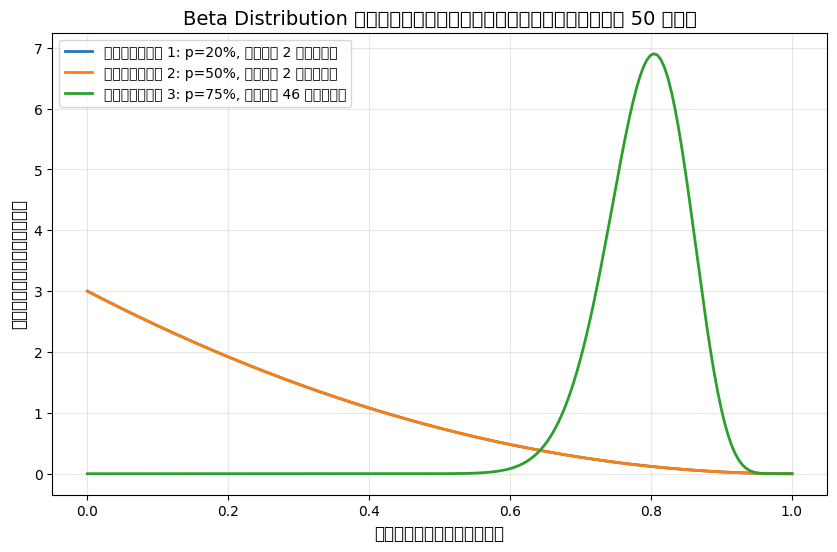


💡 สังเกต:
  - เครื่องที่เล่นบ่อย → curve แหลมขึ้น (มั่นใจมากขึ้น)
  - เครื่อง 3 (p=75%) น่าจะถูกเลือกบ่อยที่สุด


In [5]:
# ใช้ฟังก์ชัน plot จากโค้ดต้นฉบับ
plt.figure(figsize=(10, 6))
x = np.linspace(0, 1, 200)

for i, b in enumerate(bandits):
    y = beta.pdf(x, b.a, b.b)
    plt.plot(x, y, label=f"เครื่อง {i+1}: p={b.p:.0%}, เล่น {b.N} ครั้ง", linewidth=2)

plt.xlabel('ความน่าจะเป็น', fontsize=12)
plt.ylabel('ความเชื่อมั่น', fontsize=12)
plt.title('Beta Distribution ของแต่ละเครื่องหลังเล่น 50 รอบ', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("\n💡 สังเกต:")
print("  - เครื่องที่เล่นบ่อย → curve แหลมขึ้น (มั่นใจมากขึ้น)")
print("  - เครื่อง 3 (p=75%) น่าจะถูกเลือกบ่อยที่สุด")

## 🚀 Step 6: รันการทดลองเต็มรูปแบบ (2000 รอบ)

ตอนนี้เราจะใช้ฟังก์ชัน `experiment()` จากโค้ดต้นฉบับ

**ฟังก์ชันนี้จะ**:
- เล่น 2000 รอบ
- แสดงกราฟ Beta distribution ในหลาย ๆ จุด (5, 10, 20, 50, 100...)
- แสดงว่าอัลกอริทึมเรียนรู้อย่างไรเมื่อเวลาผ่านไป

มาดูกันว่าหลังจาก 2000 รอบ AI จะเรียนรู้ได้ดีแค่ไหน!

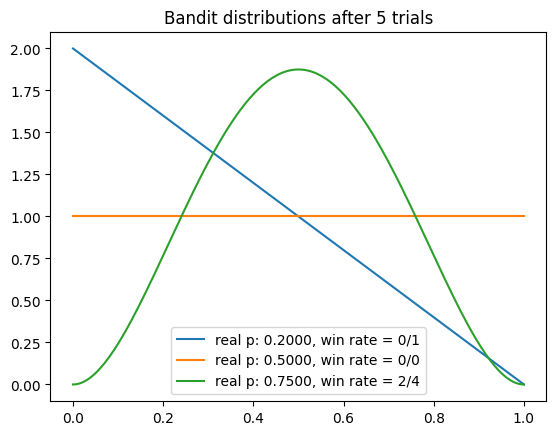

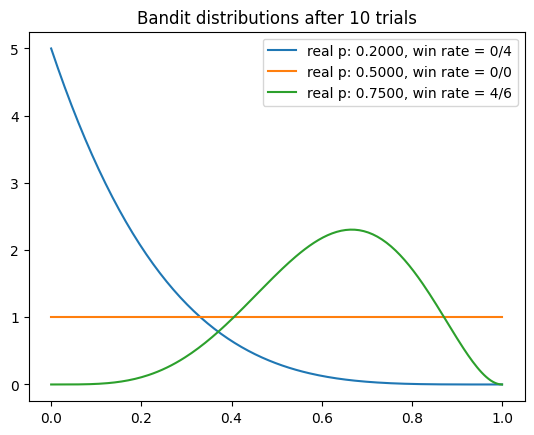

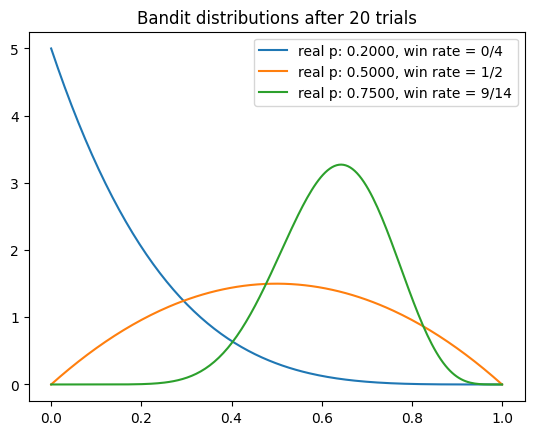

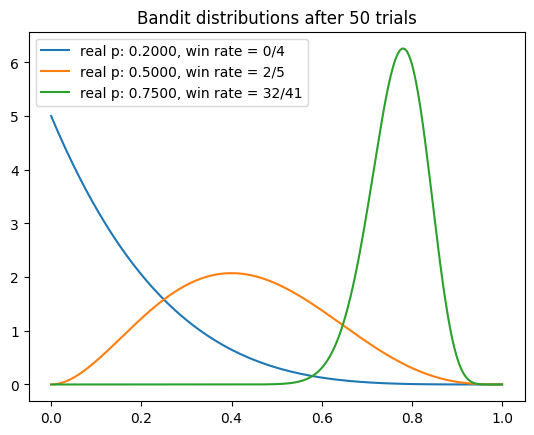

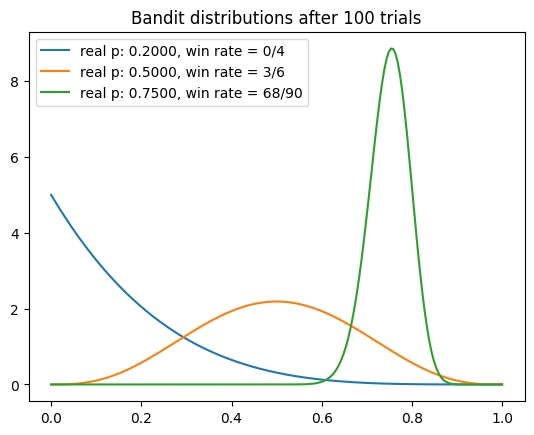

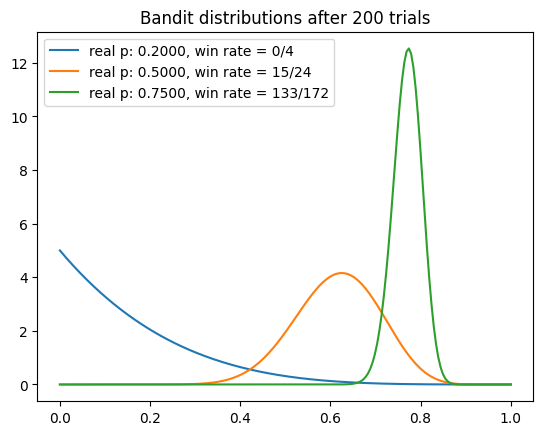

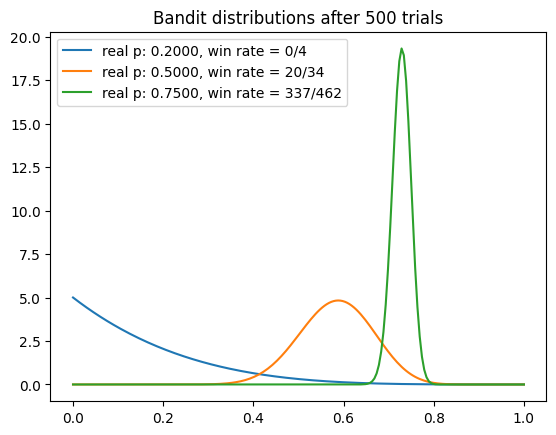

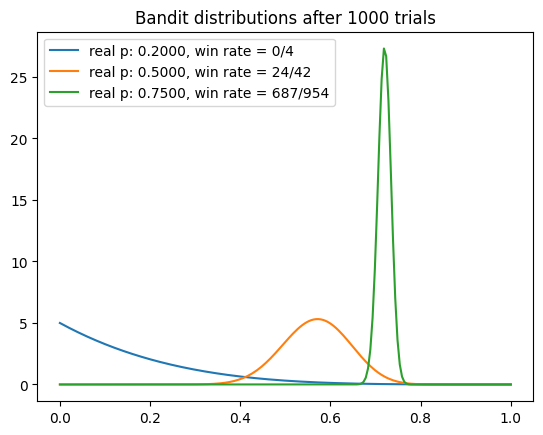

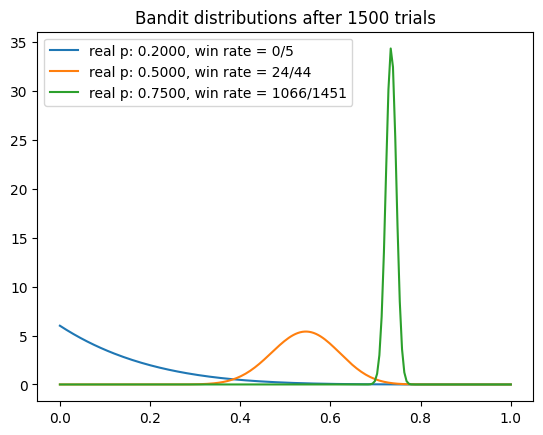

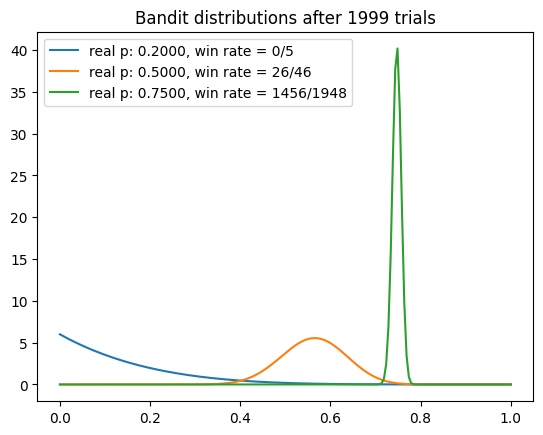

total reward earned: 1483.0
overall win rate: 0.7415
num times selected each bandit: [5, 46, 1949]


In [6]:
# รันการทดลองเต็มรูปแบบ
# จะแสดงกราฟหลาย ๆ รูป แสดงการเรียนรู้ในแต่ละช่วงเวลา
experiment()

## 🎓 สรุป: สิ่งที่เราเรียนรู้

### 🔑 แนวคิดหลัก (Key Concepts):

1. **Multi-Armed Bandit Problem** 
   - มีหลายตัวเลือก ไม่รู้ว่าอันไหนดีที่สุด
   - ต้องสมดุลระหว่าง **Explore** (ลองของใหม่) กับ **Exploit** (ใช้ของดี)

2. **Thompson Sampling**
   - สุ่มทายความน่าจะเป็นจาก Beta distribution
   - เลือกตัวที่ทายว่าดีที่สุด
   - อัพเดทความรู้หลังได้ผล

3. **Beta Distribution (a, b)**
   - แสดงความเชื่อเกี่ยวกับความน่าจะเป็น
   - `a` = จำนวนความสำเร็จ + 1
   - `b` = จำนวนความล้มเหลว + 1
   - ยิ่งมีข้อมูลมาก curve ยิ่งแหลม (มั่นใจมากขึ้น)

### 💡 ทำไมต้องใช้ Bayesian?

- **เรียนรู้แบบทีละน้อย** (Online Learning): ไม่ต้องรอให้มีข้อมูลเยอะ
- **ปรับตัวได้**: เมื่อสถานการณ์เปลี่ยน ระบบจะปรับตาม
- **มีประสิทธิภาพ**: เลือกตัวที่ดีได้เร็ว ใช้ข้อมูลน้อย

### 🌍 ใช้งานจริงได้ที่ไหน?

- 🎯 **A/B Testing**: ทดสอบ feature ใหม่ในเว็บไซต์
- 📱 **โฆษณาออนไลน์**: เลือกโฆษณาที่มี Click-through rate สูงสุด
- 🎮 **Game Design**: สร้างประสบการณ์ที่น่าสนใจที่สุด
- 💊 **Clinical Trials**: ทดสอบยาแบบมีจริยธรรม (ให้ยาดีกับคนไข้มากขึ้นเรื่อย ๆ)

---

## 🎉 ขอแสดงความยินดี!

คุณเข้าใจ Bayesian Bandit และ Thompson Sampling แล้ว! 
ลองนำไปประยุกต์ใช้กับปัญหาจริง ๆ ได้เลย! 💪